# Comparative Tests of the Pre-adaptation Hypothesis

In the first part of this lesson, we looked at three published tests of the pre-adaptation hypothesis of insecticide resistance evolution. All of those studies took a comparative statistical approach that involved some kind of regression analysis. What I thought we would do here is walk through how that works. We'll start with a simple linear regression. And then we'll add stuff to it until we get to the models that have been used to test the pre-adaptation hypothesis. As we go and things get more complicated, we'll look at models progressively less detail. Our goal is just for you to leave with a general sense of how this stuff works. For those of you with some background in statistics, a bunch of this will be review. Review is good! For the rest of you, this can serve as a hands-on introduction to what you'll learn in a much more systematic way in a statistics course. Let's get to it!

## Before we start -- What is this thing?

This is exercise is a Jupyter Notebook. This is a framework for sharing and explaining executable codes. All of the codes below are in R. A notebook is composed of a sequence of blocks. Some blocks -- like this one -- are of formatted text, called markup, that explains what is going on. Other blocks, are of code that can be run, or modified and run again. The easiest way to get through a notebook is to start by selecting the first block (this one), and then stepping through block with the 'Run' button on the top of the page.

But before you do that, each of you should make a fresh copy of the notebook that you can play around with, without having to worry about making a mess. To do that, select 'Make a Copy...' from the File Menu. Then, from ther Kernel Menu, select 'Restart & Clear Output.' Then you should be good to go.

## Linear regression.

OK. Start simple(ish). A linear regression is a simple form of machine learning. We feed the machine learning system some data, and some answers to a question about those data, and the machine (or more technically, a machine algorithm) figures out how to best come up with those answers. In other words it learns how to make good predictions.

How does it work? Well, we start by asumming that the value of one variable -- called the <b>response</b> variable -- depends on the value of one or more other variables -- called <b>predictor</b> variables. Moreover, we assume that the relationship between the response and the predictor variables can be expressed as a linear equation.

A linear equation has the form *y* = *B<sub>0</sub>* + *B<sub>1</sub>x<sub>1</sub>* ... *B<sub>n</sub>x<sub>n</sub>* + *e*, where *y* is the response, each *x* term is a predictor variable, each *B* term is a model coefficient which describes how a change in *x* maps to a change in *y*, and *e* is the error term (which gobbles up any variation in y that the rest of the predictors can't explain). The coefficients are the slopes of the linear equation. Note that *B<sub>0</sub>* is the y-intercept (what *y* equals when all predictors are zero). Also note that a linear equation can have an aribitrary number of predictors. If there is just one, then the line moves through two dimensions. If there are more predictors, the line travels through more dimensions. 

Let's look at an exaple. Let's say y = 0.1 + 2x. That's a linear equation. We can graph it.

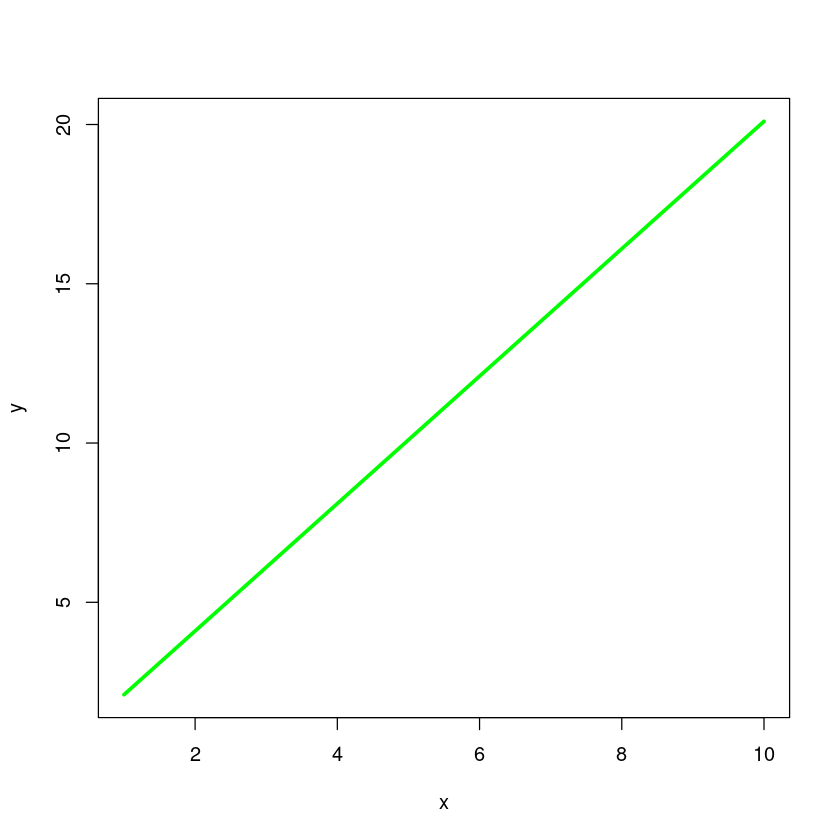

In [179]:
x <- seq(from=1,to=10,by=1)
y <- 0.1 + 2*x
plot(y~x, type='l', lwd=3, col='green')

It's a line! It maps values of x to values of y. So, if x=5, we can plug that value into the equation and find that y = 10.1.

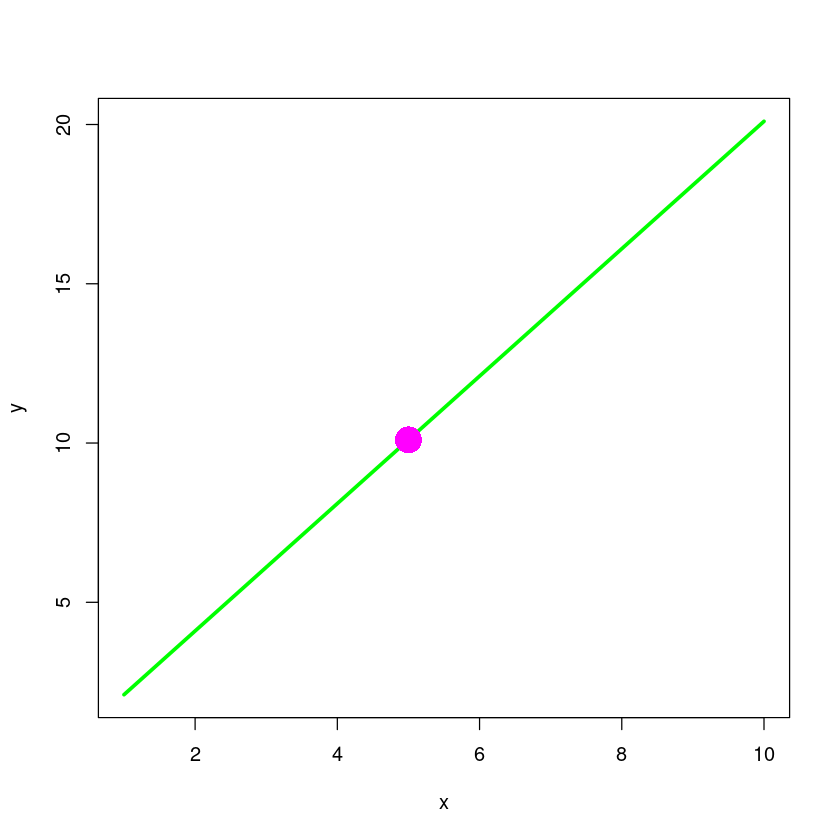

In [180]:
plot(y~x, type='l', lwd=3, col='green')
points(5,10.1,pch=16,col='magenta',cex=3)

<b>You try it!</b> Modify the code above the plot a line that describes how *y* changes with *x* with a intercept of -5, and the coefficient of *x* equal to 2.3.

When we do a linear regression, all we are doing is trying to find the linear equation that minimizes the error term. In other words we are trying to find the line that does the best job of describing the realtionships between the response and pedictors. We'll skip over the details, but typically we do that by minimizing the sum of the squares of the residuals (the distance between each datum and its predicted value). To see it in action, let's grab some data about Australian soybean farms and plot the relationship between plant size and yield.

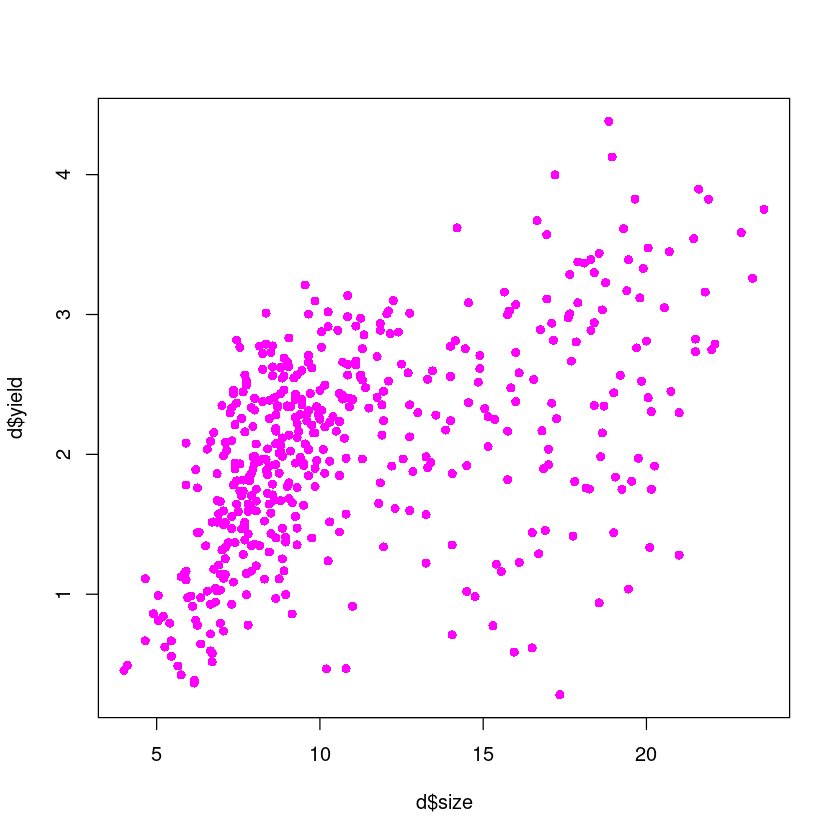

In [4]:
library(agridat)
data(australia.soybean)
d <- australia.soybean
plot(d$yield ~ d$size, pch=16, col='magenta')

A little messy, but it does look like there is a pretty linear positive relationship. In R, we can do a linear regression with the lm() function. Then we can plot our linear model.

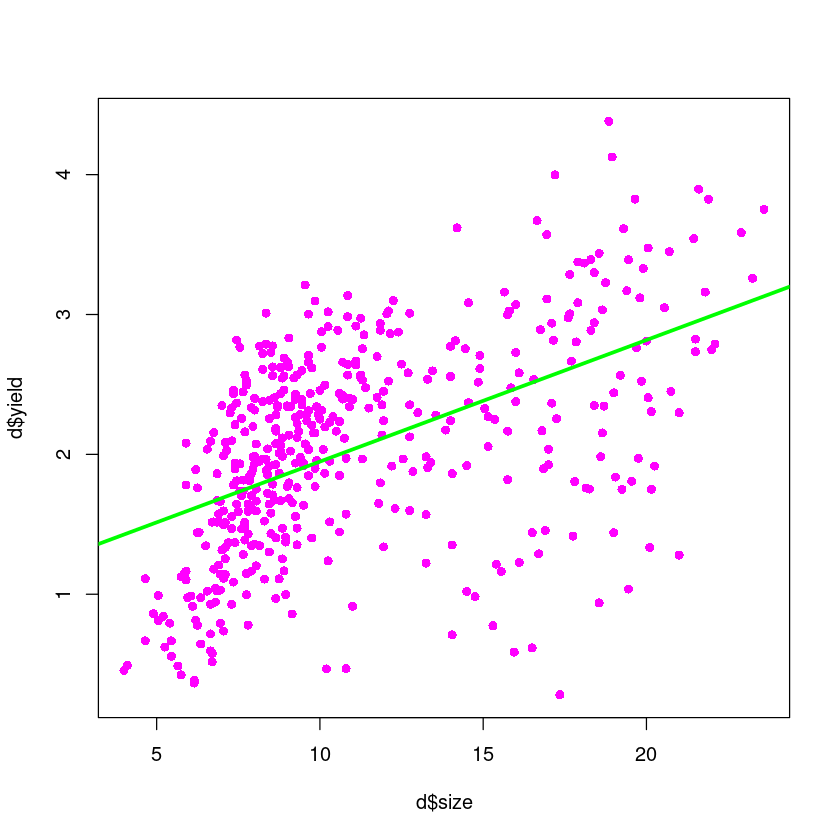

In [213]:
plot(d$yield ~ d$size, pch=16, col='magenta')
m0 <- lm(yield ~ size, data=d)
abline(m0, lwd=3, col='green')

Cool. Note that this line is a <a>hypothesis</a>. It's an attempt to explain the relationships between variables. To actually see the estimated coefficients, and get a more quantitative sense for how good the linear hypothesis is, let's have a look at the model summary output.

In [214]:
summary(m0)


Call:
lm(formula = yield ~ size, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.30534 -0.42937  0.07881  0.48597  1.66330 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.079446   0.080794   13.36   <2e-16 ***
size        0.086910   0.006736   12.90   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6457 on 462 degrees of freedom
Multiple R-squared:  0.2649,	Adjusted R-squared:  0.2633 
F-statistic: 166.5 on 1 and 462 DF,  p-value: < 2.2e-16


The centerpiece of this output info is the table of model coefficients. It has a row for each predictor variable. In this case we have two predictors, the y-intercept, and the plant size variable. The table has four columns; the first one and the last one are most important. The <b>Estimate</b> column has the estimated values for each coefficient. The <b>Pr(>|t)</b> column gives us the p-value for each coefficient. A p-value is an estimate of the statistical significance of an effect. The smaller the p-value, the more significant the effect. In this case, even though our data are messy, we still find a significant positive (becuase of the sign of the coefficient) effect from soybean plant size on yield.

Later in the model summary information, we find a report of the R-squared value, which is about 0.26. That tells us that the linear model explains about 26% of the variation in the response variable. That might not seem very impressive, but in ecology, that's impressive.

From the information in coefficients table we can piece together the estimated linear equation. It's this:
yield = 1.08 + 0.09 * plant_size. The value 0.09 is the coefficient of the size variable. It tells us how much yield changes with every unit increase in plant size. We can use this equation to make predictions. For example, if we know the size of plant is 10.3, the predicted yield = 1.08 + 0.09 x 10.3 = 1.97. 

One the plot:


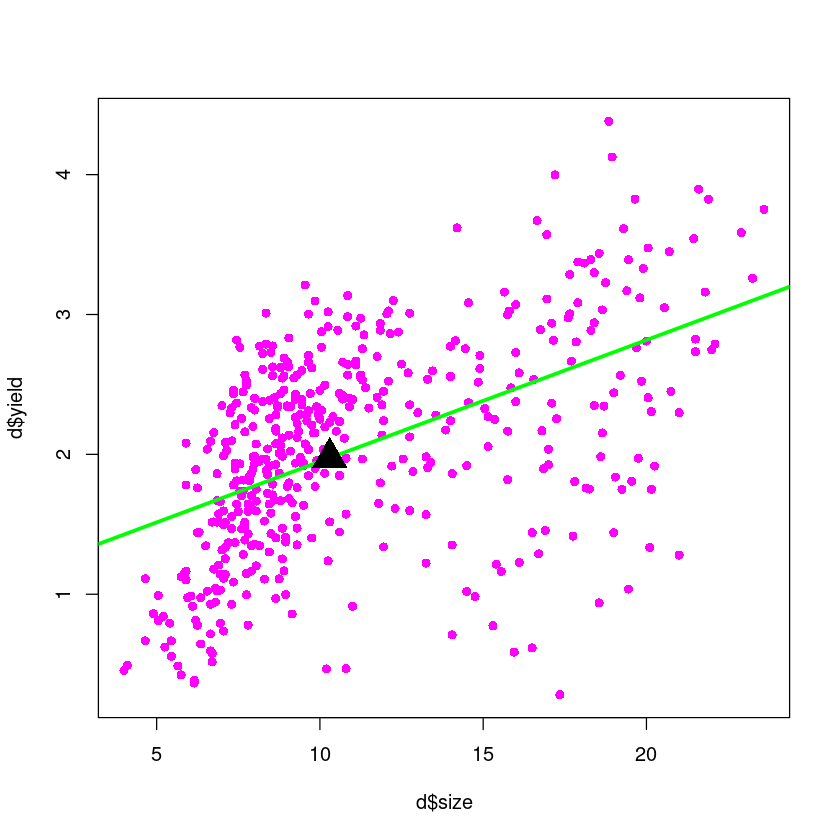

In [216]:
plot(d$yield ~ d$size, pch=16, col='magenta')
m0 <- lm(yield ~ size, data=d)
abline(m0, lwd=3, col='green')
predicted = m0$coefficients[1] + m0$coefficients[2]*10.3
points(10.3, predicted, pch=17, cex=3)

Got it? To review, a linear equation can be used as a simple hypothesis to explain the relationships between some variables. Linear regression is a way of fitting a line to some data and coming up with a good hypothesis. Once we have a linear hypothesis, we can see how well it explain some data, and we can use it make predictions. It works great when certain assumptions about the data are met. But it can be terrible if those assumptions are not meant. Read on to see how.

<b>You try it!</b> The Australian soybean data that we've been playing with is in an R object called a data frame, that we assigned to the variable *d*. A data frame is a special kind of data table. We can grab a column vector from that table by referring to the column name like this: d\\$column_name. For example, in the code above, we referred to the column vectors d$yield and d\\$size. Data frame *d* also has a column vector for the oil content of seeds, in d\\$oil. Modify the code above to plot how oil content depends on plant size, and then fit a linear model to that relationship.

## Logistic regression.

OK. Basic linear regression works great for estimating the (linear) effects of one or more predictor variables on a *continuous* response variable, that is, a variable that could take on any real number value within some range. But it doesn't work so great for other types of response variables, such as categorical responses where only a few *discrete* classes of outcomes are possible. For example, a plant pathologist might need to predict if a tomato plant has a virus infection. In that case, there are two possible outcomes. Either the tomato has the virus, or it is virus free. That's called a binary (two possibilities) response. Or the pathologist might be trying to tell if her tomatoes have any one of several different virus infections. In that case she has a more-than-two-possibilities categorical response variable. These are called *classification problems*. 

We can solve classification problems by adding a mathematical gadget called a link function to our basic linear regression algorithm. Specifically, we add a logit (inverse of logistic) link. But before we do that, let's try and get a better sense why basic linear regression isn't a good tool for classification problems.



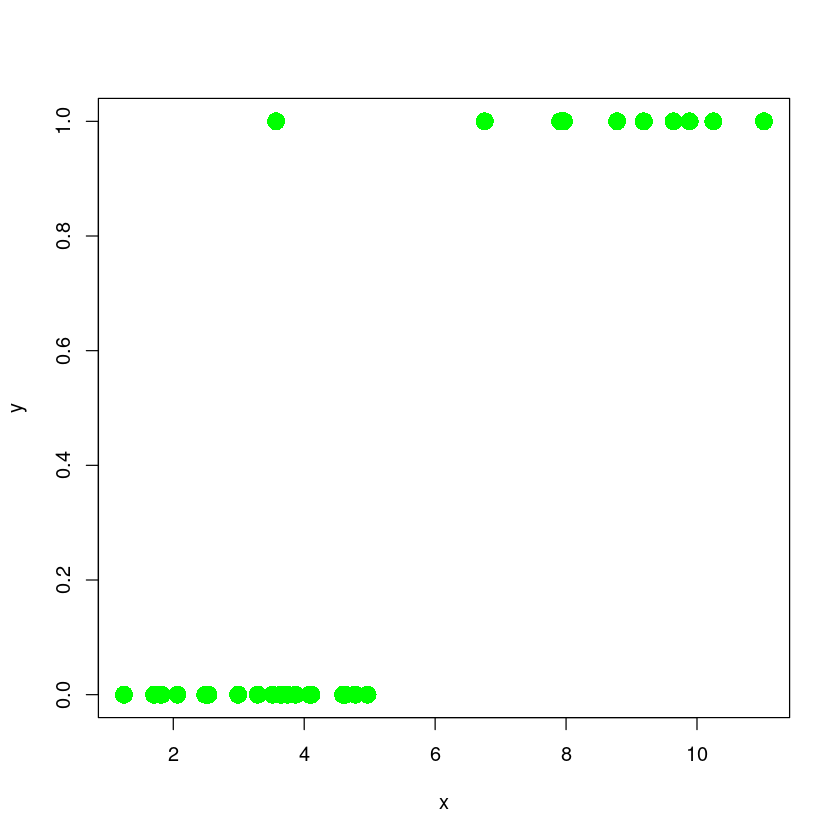

In [6]:
#First we'll make some data ;-P
#In R, text that comes after a pound sign (#) is a comment. It doesn't get executed as code.
set.seed(1) #set the seed for the random number generator, so that results are repeatable
x1 <- runif(20, min=1, max=5) #draw 20 samples from a uniform distribution spanning 1 and 5.
x2 <- rnorm(10, 8, 2) #draw 10 samples from a normal distribution with mean 8 and standard deviation 2.
x <- c(x1, x2) # stick those samples together in one vector
y1 <- rep(0,20) #now generate some binary response variables
y2 <- rep(1,10)
y <- c(y1,y2)
plot(y ~x, pch=16, col='green', cex=2) #plot the mapping responses to predictors

So, here we have a binary response variable y, it can take the value 0 or 1. (And those values can be mapped to two classes such as sick tomato / healthy tomato). Let's fit a linear model to these data.

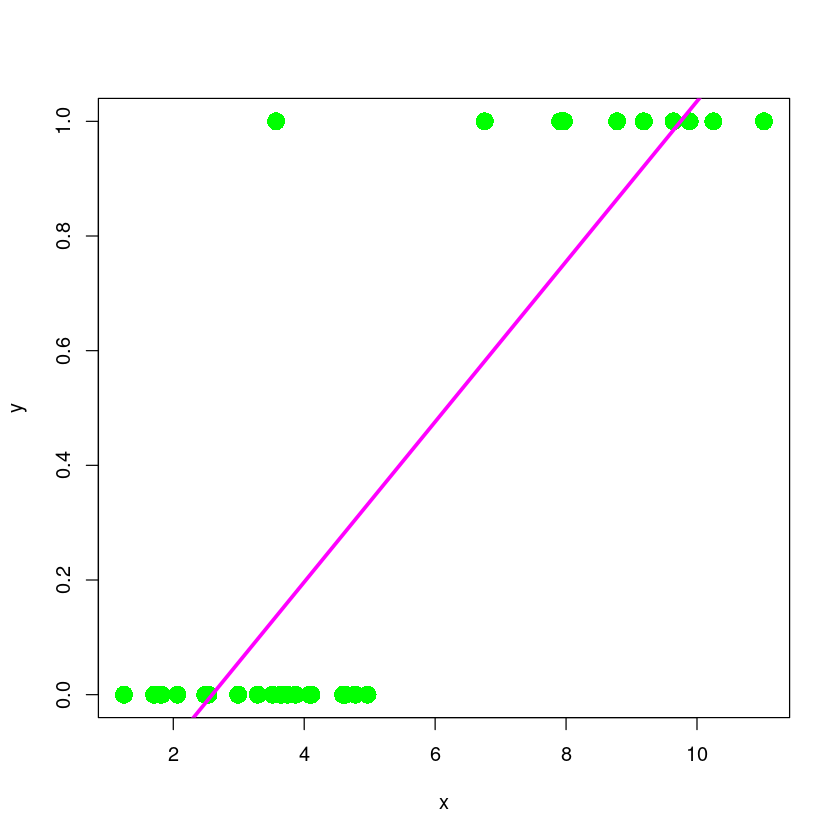

In [7]:
m.lin <- lm(y ~x) #fits a line to the data
plot(y ~x, pch=16, col='green', cex=2) 
abline(m.lin, lwd=3, col='magenta') # draws that line on our scatter plot

Not terrible. We could then use this linear function for classification by setting some threshold -- 0.5 would be good -- and saying that when our linear model outputs a value less than the threshold our tomato is healthy, and when it outputs a value greater than the threshold it's sick.

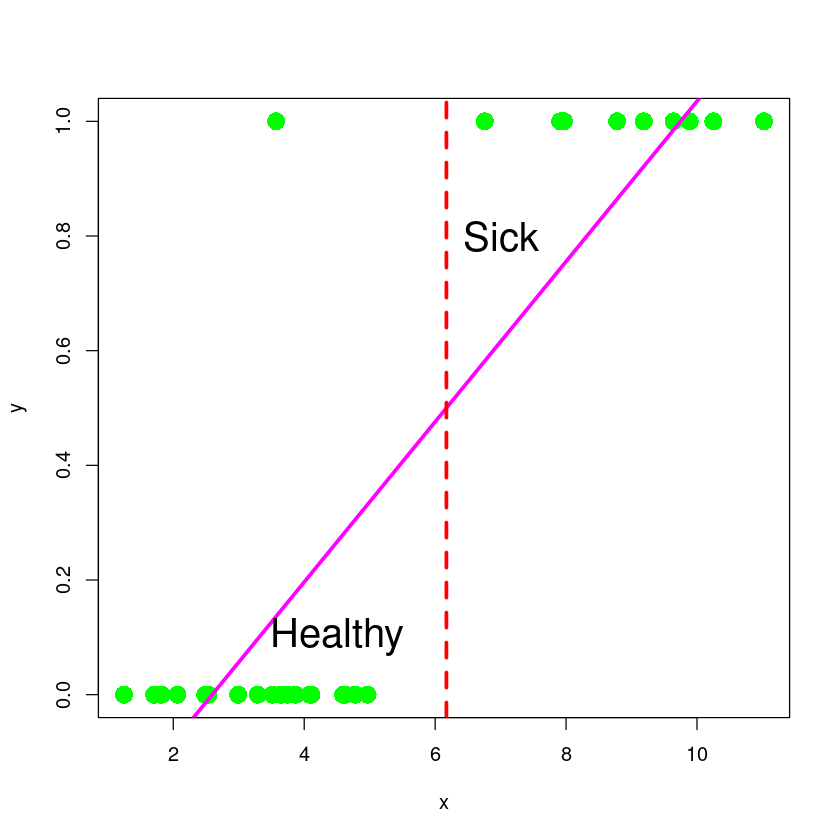

In [8]:
plot(y ~x, pch=16, col='green', cex=2)
abline(m.lin, lwd=3, col='magenta')
y.intercept <- m.lin$coefficients[1]
x.coef <- m.lin$coefficients[2]
x.thresh <- (0.5 - y.intercept)/x.coef
abline(v=x.thresh, lty=2, lwd=3, col='red')
text(7,0.8,'Sick',cex=2)
text(4.5,0.1,'Healthy',cex=2)

It's not perfect (one sick tomato would be classified as healthy), but it's not too bad. To be clear, a linear function -- just like any other function -- is something that *maps* one set of values to another. Here, x-values less than our threshold are mapped to y values < 0.5, which we use as the cutoff for classifying tomatoes as either sick or healthy.

Now here's the problem. What happens when we add a few larger values for x.

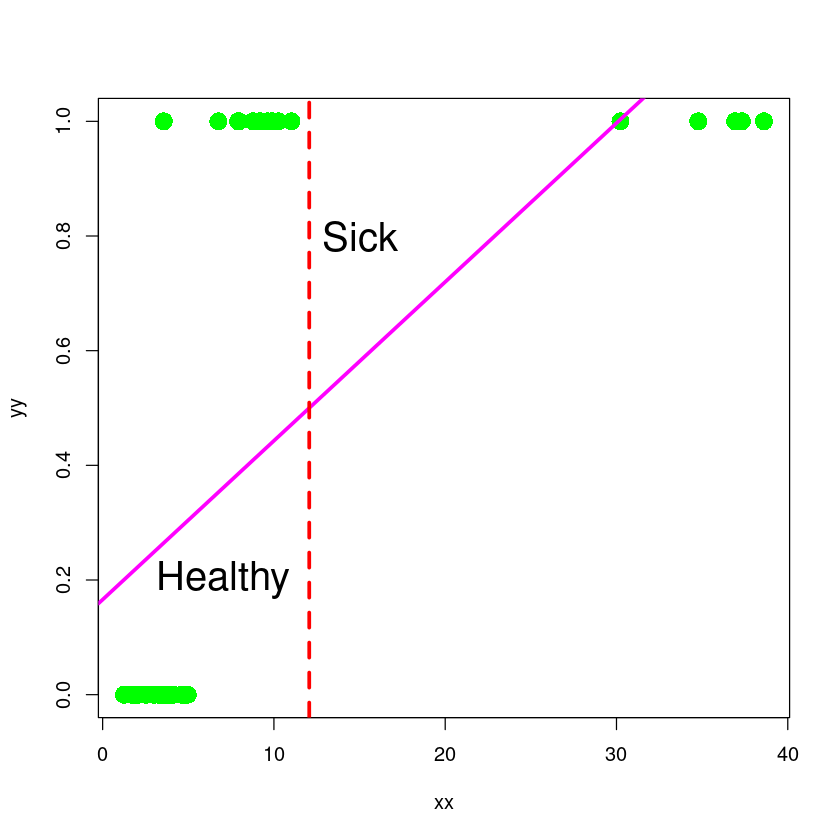

In [10]:
xx <- c(x, runif(6,min=30,max=40)) #six random draws from a uniform distribution spanning 30 and 40
yy <- c(y, rep(1, 6))
m.lin.2 <- lm(yy ~xx)
plot(yy ~xx, pch=16, col='green', cex=2)
abline(m.lin.2, lwd=3, col='magenta')
y.intercept <- m.lin.2$coefficients[1]
x.coef <- m.lin.2$coefficients[2]
x.thresh <- (0.5 - y.intercept)/x.coef
abline(v=x.thresh, lty=2, lwd=3, col='red')
text(15,0.8,'Sick',cex=2)
text(7,0.2,'Healthy',cex=2)


See what happened? A little extra data changed the slope of the linear equation, and now our threshold doesn't work. More of our sick plants fall to the left of the vertical line, and would be classified as healthy. We need something better. We need logistic regression!

To repeat, a linear equation can be a hypothesis that explains the relationships between variables. What we are going to do here is basically shove that hypothesis inside of a another function, one that has the form 1/1+e^-x, where x would be the output of our linear hypothesis. That's the logistic, a.k.a. sigmoid function. Let plot it over a span of x values from -5 to +5.

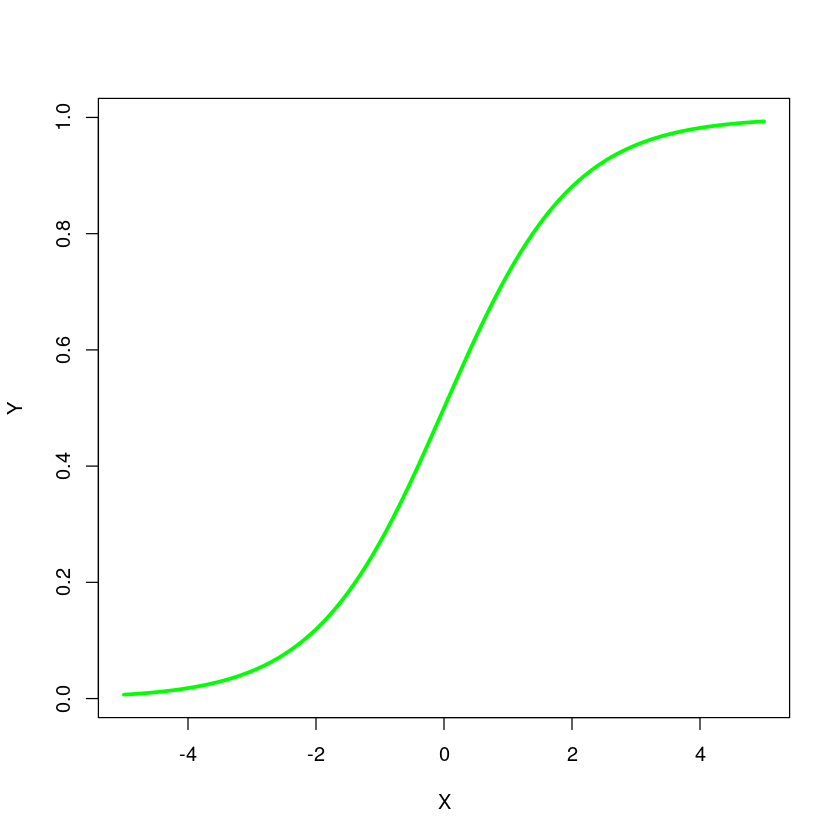

In [11]:
X <- seq(from=-5,to=5,by=0.1)
Y <- 1/(1+exp(-X))
plot(Y~X, type='l', lwd=3, col='green')

Cool! Note that the logistic function has several nice proporties -- that's the whole reason why we're using it. For one, its output is bounded between 0 and 1. That's good, since our response variable can only be 0 or 1. By contrast, the linear function was bounded between negative and positive infinity. Which wasn't so good. Also, the output of the logistic function can be intepretted as the probability that y=1. That's handy for a binary classification problem, where we can interpret y=1 as y equalling one of the two binary states of our response variable, e.g., a sick tomato.

With the logistic function we still have threshold value that acts as a classification decision boundary. Actually it's the same threshold we used before the linear model, 0.5. But in this case, the state of the function changes more rapidly around the boundary than far way from it. In other words the slope is steepest at the decision boundary. That's also good.

OK. Let's look at a logistic regression of our toy data.

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


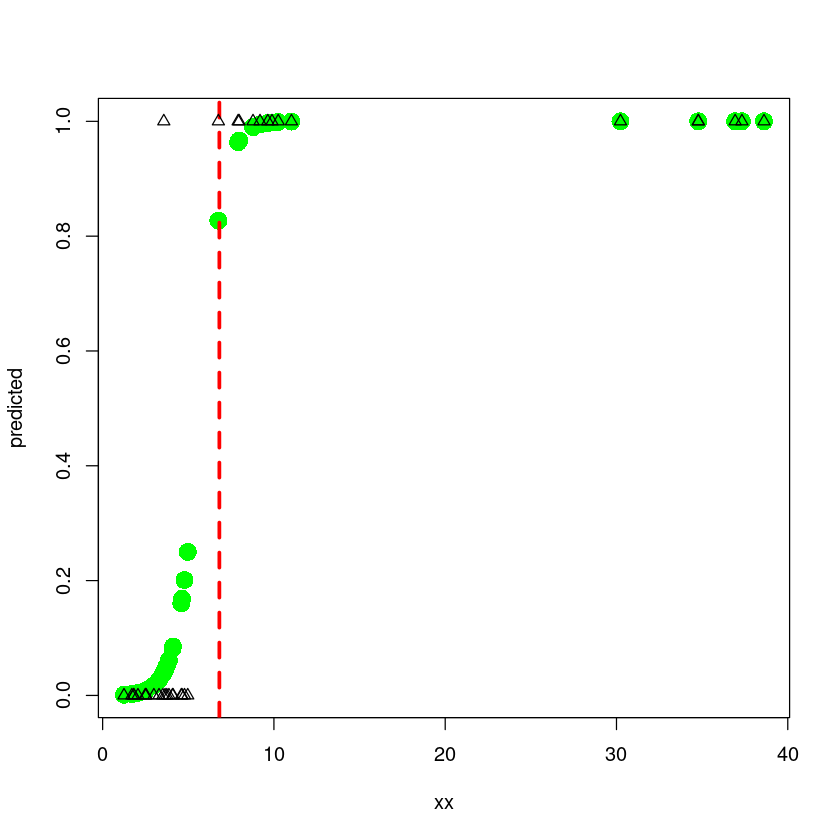

In [13]:
d <- data.frame(cbind(yy,xx))
m.log <- glm(yy ~ xx, data=d, family=binomial(link="logit"), control = list(maxit = 100))
#summary(m.log) ##you could uncomment this if you wanted to see the model summary
##Don't worry about this next chunk of code, it just lets us figure out the x threshold value for plotting
y.intercept <- m.log$coefficients[1]
x.coef <- m.log$coefficients[2]
y.thresh <- exp(0.5)
y.odds <- y + y.thresh*y
x.thresh <- (y.thresh - y.intercept)/x.coef
predicted <- plogis(predict(m.log, d)) 
plot(predicted~xx, pch=16, col='green', cex=2)
abline(v=x.thresh, lwd=3, lty=2, col='red')
points(xx,yy, pch=2, cex=1)



(Nevermind that warning message.) That looks much better. The empty triangles show the real values of *y* for each value of *x* in our data set. The green circles show the probabilies of each tomato plant being sick, according to our logistic function. The vertical dashed red line shows the threshold value for *x*, beyond which the output of the logistic function is greater than 0.5, and we classify a tomato as being sick. Note that this cuttof is in a much better place than where it was with simple linear regression.

As I mentioned earlier, we can use logistic regression for a multi-state categorical response variable. The trick is to just treat our response as a set of this-one-versus-the-rest binary comparisons. We won't get into how. 

OK. Back to the pre-adaptation hypothesis. In the first published test, Jay Rosenheim and company used logistic regression to test the hypothesis that herbivores that suck sap will evolve less insecticide resistance than herbivores with other trophic modes. Their response variable was a discete categorical variable, with a level for each number of insecticide classes resisted. But there are a couple of problems with that approach. The first is that a logistic model still doesn't really capture the nature of their response variable -- counts of resistance cases. Counts aren't really categories; they're counts! And the values of a count variable are related to one another in a way that doesn't apply to categorical variables. Logistic regression is one way of dealing with non-normal variances in response varibles. But for count data, we really want some other way of doing that.

The other problem is that Jay's logistic regression didn't account for a key source of non-independence among his observations: *Pest insects share an evolutionary past.*

## Phylogenetic pseudoreplication

Here's the deal. If we observe that two species share a trait, it could be that they each evolved that trait independently through parallel responses to selection. Alternatively, it could be that they inherited the trait from a common ancestor. Ignoring the possibility of this inheritance causes us to inflate our count of the independent observations of a trait, which biases any statistical analysis of how that trait is associated with other traits.

Let's illustrate:

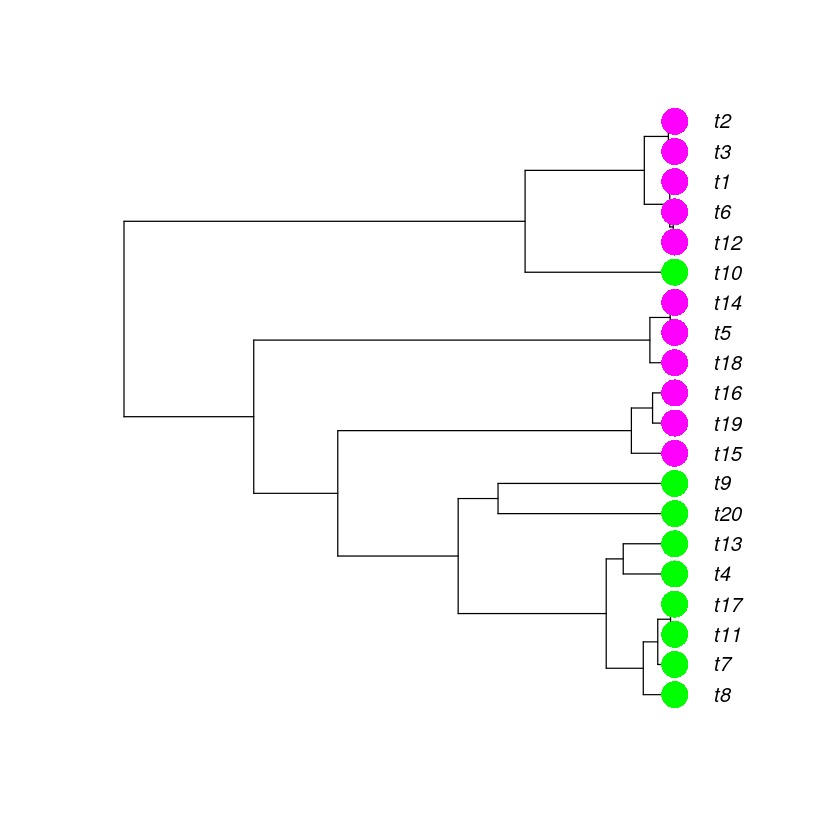

In [14]:
library(ape) # load an R library that lets us work with phylogenies
set.seed(1) # to make random simulations repeatable
t <- rcoal(20) # simulate a random phylogeny
t$edge.length <- t$edge.length * 10 # stretch out the branches of that phylogeny
h <- as.character(rTraitDisc(t, model='ER', k=2)) #simulate the history of a binary character over that phylogeny
h[h=='A'] <- 'green' #the rest of the code just plots the phylogeny, and the character states of species
h[h=='B'] <- 'magenta'
plot(t, show.tip.label=TRUE, label.offset=1)
tiplabels(pch=16, col=h, cex=3)


Suppose that this is a moth phylogeny, and that species with fluffy scales are in green, and those with not-fluffy scales are shown in magenta. Also suppose that we hypothesize that fluffy scales confer protection against bat predators. We would like to test the statistical association between fluffy scales and low mortality from bats.

How many independant origins of fluffy scales are we working with? Consider species t7. It has fluffy scales. But it inherited them from an ancestor it shares with several other species, including t9, t20, t8 and t4. In fact, given this phylogeny, we can probably only get about two independent observations of the effect of fluffy scales on bat predation.

But all is not lost. We just need to add another gadget to our linear modeling framework, one that allows us to account for statistical non-independence due to shared ancestry. What we need are *random* effects.

## Generalized Linear Mixed Model Regression

Right. Using the pre-adaptation hypothesis, we predicted that pest insects with broader diets would evolve resistance to more insecticides. To test that prediction we used Generalized Linear Mixed Model Regression. This is a linear regression that works for funky response variables, such as count data or categorical data, and which incorporates random effects to account for potential sources of non-indepedence. A little more detail. Generalized linear models are models that use link funtions (like in logistic regression) to map values of response variables to values of predictor variables. We've seen before how these link functions can do a better job of describing the expected variation in a response variable. The variation in a count variable is well approximated by something called a <b>Poisson</b> distrubution. So we did a Poisson regression.

Mixed linear models have a mix of fixed and random effects. The fixed effects are the predictor variables that we've been talking about. Our primary aim is usually to understand how our response variable is affected by the fixed predictors. Random effects are potential sources of non-independence in a data set. We include random effects in a model to try and remove bias from our observations of the relations between fixed predictors and the response.

In our study, we had to account for the random effects of phylogenetic ancestry. We did that in two ways. Here I'll just show a simplified version of the easier way. We'll incorportate nested random effects for two levels of the taxonomic classification: order and family.

OK. Let's grab the data and do an analysis.


In [16]:
library(RCurl)
library(ape)
library(lme4)

url <- "https://bucketofrain.s3.amazonaws.com/Hardy_etal_2017_S2_CompData.csv"
dn <- getURL(url, ssl.verifypeer=FALSE)
con <- textConnection(dn)
d <- read.csv(con)
head(d)

Loading required package: Matrix



,animal,GENUS,FAMILY,ORDER,gpy,host_count,poison_count,ploidy,docs
,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<int>
1,Acalitus_essigi,Acalitus,Eriophyidae,Prostigmata,NA,NA,0,HD,1
2,Acalymma_trivittatum,Acalymma,Chrysomelidae,Coleoptera,1.5,11,0,DD,1
3,Acalymma_vittatum,Acalymma,Chrysomelidae,Coleoptera,1.5,31,3,DD,26
4,Acanthoscelides_obtectus,Acanthoscelides,Chrysomelidae,Coleoptera,6.5,NA,0,DD,62
5,Aceratagallia_sanguinolenta,Aceratagallia,Cicadellidae,Hemiptera,3.0,8,0,DD,1
6,Aceria_caryae,Aceria,Eriophyidae,Prostigmata,NA,NA,0,HD,0


The head() command just prints the first few lines of the data set. That should be enough to get the idea. It's just a big table that has a variety of information about a number of insect pest species, such as how many pesticides they've evolved resistance to (poison_count), and how broad their diet is (host_count).

Next let's have a peak at the phylogeny of the US pests of agriculture. (Even though we won't actually use it in our demonstration here.) We did use it in some slightly more sophisticated analyses in our study.

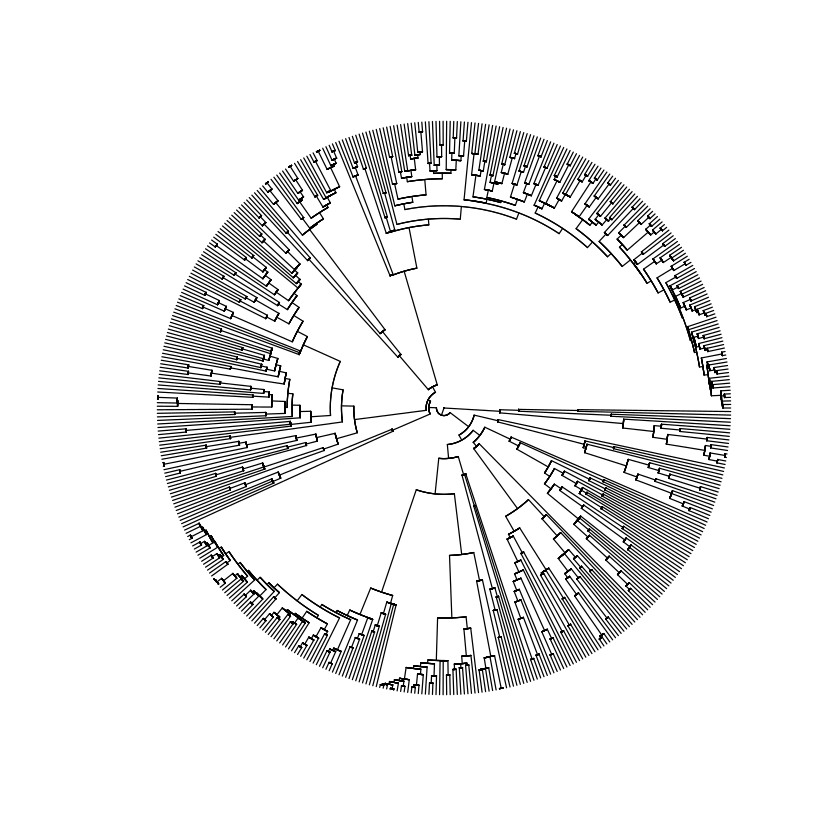

In [17]:
tree.url <- "https://bucketofrain.s3.amazonaws.com/Hardy_etal_2017_S3_PestInsects.tre"
tree.dn <- getURL(tree.url, ssl.verifypeer=FALSE)
tree.con <- textConnection(tree.dn)
t <- read.tree(tree.con)
plot(t, type='fan', show.tip.label=FALSE)

OK. On with the analysis. Here, our model has mutliple predictors. You'll see this referred to as a multi-variate model. Whenever you have a bunch of predictors it's a good idea to put them all on the same scale, so that one variable doesn't swamp the others just because of the units in which it was measured. There several ways of rescaling variables. The most common is to center each variable, by subtracting the mean from each value, and then scale it by expressing it in units of standard deviations (that is, divide each value by the variable's standard deviation). 

In [18]:
d <- na.omit(d)
##standardize variables
d$host_count <- (d$host_count - mean(d$host_count))/sd(d$host_count)
d$gpy <- (d$gpy - mean(d$gpy))/sd(d$gpy)
d$docs <- (d$docs - mean(d$docs))/sd(d$docs)

Now we're ready to run. Here, to fit our model, we'll use the function glmer from the R package lme4. A few notes on the model specification in the next block. Our response is the *poison_count* variable. We try try to explain the variation in that varibale with five fixed effect predictors, and the nested random effects from taxonomy. The predictors are *host_count* (pest diet breadth), *gpy* (generations per year), *gpy^2* (a quadratic effect of generations per year), *docs* (a measure of a pest's fame; a count of citations in the research literature), and *ploidy* (how many copies of the genome). The 'family' argument of the glmer function lets us specify what kind of variation distribution we expect for our response variable. As mentioned above, for count data, a Poisson distribution is a good option.

In [226]:
#glmerControl(optimizer="bobyqa",optCtrl=list(maxfun=2e5))
m1 <- glmer(poison_count ~ host_count + poly(gpy, 2) + docs + ploidy + (1|ORDER/FAMILY), data=d, family = poisson(link = "log"))
summary(m1)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: poison_count ~ host_count + poly(gpy, 2) + docs + ploidy + (1 |  
    ORDER/FAMILY)
   Data: d

     AIC      BIC   logLik deviance df.resid 
  1050.8   1084.4   -517.4   1034.8      484 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1934 -0.6591 -0.4529 -0.2857  8.6735 

Random effects:
 Groups       Name        Variance Std.Dev.
 FAMILY:ORDER (Intercept) 1.49575  1.2230  
 ORDER        (Intercept) 0.03911  0.1978  
Number of obs: 492, groups:  FAMILY:ORDER, 61; ORDER, 7

Fixed effects:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -1.02010    0.27253  -3.743 0.000182 ***
host_count     0.39739    0.05128   7.750 9.19e-15 ***
poly(gpy, 2)1  7.09877    2.98725   2.376 0.017485 *  
poly(gpy, 2)2 -5.56700    1.92368  -2.894 0.003805 ** 
docs           0.21377    0.03292   6.494 8.35e-11 ***
ploidyHD      -0.42071    0.59

This is a model summary table, like the one we looked at above, but for a more complicated model. The thing we care most about here is the estimated coefficient for the host_count predictor variable. Have a look. How does host_count affect resistance evolution? Is that effect signficant?

## Survival analysis.

A quick recap: So far we've seen that the relationships between a response variable and a set of predictor variables can be described by a linear equation, that is, a line. We can find the line that best explains a set of relationships with regression analysis. Moreover, by adding gadjets -- such as link functions and random effects -- to a basic regression analysis, we can work with funky response variables, and account for sources of non-independence in our data. 

In this last part of the exercise, we'll have a quick look at survival analysis. This can be seen as another elaboration on linear regression, one that lets us understand the variation in how long something takes to happen. One of its tricks is to replace the response variable with something called a hazard function, which outputs the risk per unit time of that something happening. Another trick is to recognize that our experimental(ish) observations of how long something takes can end in two ways: The event can happen, or the observational period can end (before the event happened). We won't get into the technical details here. 

OK. Let's see how it works. First we'll load our data.

In [19]:
url <- 'https://bucketofrain.s3.amazonaws.com/top-crops-deltasP9.csv'
dn <- getURL(url, ssl.verifypeer=FALSE)
con <- textConnection(dn)
d <- read.csv(con)
head(d)

,start,stop,delta,sp,poison,status,chemdist,GENUS,FAMILY,ORDER,gpy,host_count,poison_count,ploidy,docs,MoAl1,MoAl2,closechem
,<int>,<int>,<int>,<fct>,<fct>,<int>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>
1,1968,1983,15,Trichoplusia_ni,Methomyl,1,0.2333333,Trichoplusia,Noctuidae,Lepidoptera,3.0,69,4,DD,1009,"Acetylcholine esterase inhibitors, Carbamates",Acetylcholine esterase inhibitors,s-methyl-cysteine
2,1999,2000,1,Plutella_xylostella,Emamectin benzoate,1,0.7471264,Plutella,Plutellidae,Lepidoptera,4.5,18,15,DD,1006,Glutamate-gated chloride channel (GluCl) allosteric modulators,GABA-gated chloride channel antagonists,yuanhuacine
3,2012,2014,2,Bemisia_tabaci,Flupyradifurone,1,0.3618421,Bemisia,Aleyrodidae,Hemiptera,13.0,100,10,HD,1032,Nicotinic acetylcholine receptor (nAChR) competitive modulators,nAChR modulators,l-anatabine
4,1952,1955,3,Myzus_persicae,Malathion,1,0.2839506,Myzus,Aphididae,Hemiptera,17.5,861,6,DD,907,"Acetylcholine esterase inhibitors, Organophophates",Acetylcholine esterase inhibitors,ethyl-2-methyl-butyrate
5,2002,2006,4,Leptinotarsa_decemlineata,Clothianidin,1,0.2389381,Leptinotarsa,Chrysomelidae,Coleoptera,2.0,66,9,DD,447,"Nicotinic Acetylcholine receptor agonists / antagonists, Neonicotinoids",nAChR modulators,x2-4-dimethyl-thiazole
6,1965,1969,4,Bucculatrix_thurberiella,Dicrotophos,1,0.3125000,Bucculatrix,Bucculatricidae,Lepidoptera,5.0,2,3,HD,3,"Acetylcholine esterase inhibitors, Organophophates",Acetylcholine esterase inhibitors,x-r--dihydro-maleimide


Have a look at the first few rows of the data. Each record has a start date (the year at which a pesticide was registered for a particular crop), and an end date (either the first year that resistance was recorded, or the end of the observations period, 2020). The status variable is set to 1 when a stop date is a record of resistance, and 0 when a stop date is the end of the observation period. The rest of our data are similar to what we were working with earlier, except now we have some measure of the chemical similarity between an insecticide and the chemicals in an insect's diet, and we get the name of the diet chemical that is the closest match to the insecticide in each row.

OK. Now we'll specify and fit the survival model. (After first doing some data reformatting and rescaling.)

In [21]:
library(survival)
library(survminer)
library(coxme)
d <- na.omit(d)
d <- subset(d, chemdist != 0)
d <- subset(d, delta > 0)
d$foo <- d$delta / d$gpy
d$host_count <- log(d$host_count)
d$docs <- log(d$docs + 1)
d$host_count <- (d$host_count - mean(d$host_count))/(max(d$host_count)-min(d$host_count))
d$gpy <- (d$gpy - mean(d$gpy))/(max(d$gpy)-min(d$gpy))
d$docs <- (d$docs - mean(d$docs))/(max(d$docs)-min(d$docs))

mX <- coxme(Surv(delta, status) ~ poly(host_count,2) + poly(chemdist,2) + docs + ploidy + poly(gpy,2) + (1|FAMILY/sp) + (1|MoAl2), data=d, control=coxme.control(iter.max=500))
summary(mX)

Cox mixed-effects model fit by maximum likelihood
  Data: d
  events, n = 173, 5268
  Iterations= 28 180 
                    NULL Integrated    Fitted
Log-likelihood -1421.209  -1260.457 -1193.604

                   Chisq    df p    AIC    BIC
Integrated loglik 321.50 11.00 0 299.50 264.82
 Penalized loglik 455.21 53.22 0 348.76 180.94

Model:  Surv(delta, status) ~ poly(host_count, 2) + poly(chemdist, 2) +      docs + ploidy + poly(gpy, 2) + (1 | FAMILY/sp) + (1 | MoAl2) 
Fixed coefficients
                            coef    exp(coef)   se(coef)     z       p
poly(host_count, 2)1   3.0541736 2.120366e+01 15.3596903  0.20 8.4e-01
poly(host_count, 2)2  40.5765435 4.189565e+17 14.0016966  2.90 3.8e-03
poly(chemdist, 2)1     1.4230232 4.149647e+00  6.8080950  0.21 8.3e-01
poly(chemdist, 2)2   -11.1621049 1.420232e-05  5.6075052 -1.99 4.7e-02
docs                   5.3029694 2.009326e+02  0.7957628  6.66 2.7e-11
ploidyHD               0.7354494 2.086419e+00  0.4842646  1.52 1.3e-01
poly

Above is a model summary table much like what we've seen for other regression analyses. Positive predictor variable coefficients increase the risk per unit time of resistance evolution (and hence increase the rate of resistance evolution). Negative predictor coefficients, descrease risk and rates. But mind the p-values. 

I hit on the main points in the Canvas lesson, but try and make sense of this table. What effects are signigicant? What effects are not signficant? Do more polyphagous pests evolve resistance more rapidly? What is the effect of insecticide-phytochemical similarity on the rate of resistance evolution? 

## Conclusions
Using analyses just a little more complicated than what you've played around with here, my collaborators and I were able to gain fresh insights into how herbivorous insects evolve resistance to insecticides. This could help us predict and prevent resistance evolution. 

Hopefully, this exercise has left you with a feel for what's involved in comparative research. And hopefully, it's got you thinking about how you might apply these kinds of approaches to address your own research questions. Comparative approaches let us test the general applicability of the formal ecological theory. They are good thing to have in your research tool box!